In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

savepath = "C:\\Users\\MC JB\\Dropbox\\dt\\Edinburgh\\MLP\\2\\report\\"

In [11]:
save_exp2 = False
save_exp4 = False

In [12]:
# experiments with number of filters
exp = 'filters'
path = "C:\\Users\\MC JB\\Dropbox\\dt\Edinburgh\\MLP\\2\\result_outputs\\"
common_exp_name = 'exp2'
results_path = '\\result_outputs\\summary.csv'
time_path = '\\result_outputs\\time.txt'
test_path = '\\result_outputs\\test_summary.csv'
num_params_path = '\\result_outputs\\num_params.txt'

# variable parameters, in order of the loops in the experiment (outer loops first):

# constant, important for analysis
num_epochs = 100

num_reps = 3
num_var1 = 5
num_var2 = 6

var1_name = "Dimension reduction method"
var2_name = "Number of filters"

var1_vals = ['Strided convolution' , 'Dilated convolution', 'Max pooling', 'Average pooling', 'No dimensionality reduction']
var2_vals = [2, 4, 8, 16, 32, 64]


In [3]:
# experiments with number of layers
exp = 'layers'
path = "C:\\Users\\MC JB\\Dropbox\\dt\Edinburgh\\MLP\\2\\result_outputs\\"
common_exp_name = 'exp4_'
exp_name_4_layers = 'exp2'
exp_4_ind = 4
results_path = '\\result_outputs\\summary.csv'
time_path = '\\result_outputs\\time.txt'
test_path = '\\result_outputs\\test_summary.csv'
num_params_path = '\\result_outputs\\num_params.txt'

# variable parameters, in order of the loops in the experiment (outer loops first):

# constant, important for analysis
num_epochs = 100

num_reps = 3
num_var1 = 5
num_var2 = 3

var1_name = "Dimension reduction method"
var2_name = "Number of ConvLayers"

var1_vals = ['strided_convolution' , 'dilated_convolution', 'max_pooling', 'avg_pooling', 'No dimensionality reduction']
var2_vals = [2, 3, 4]




In [138]:
# experiment with bias
exp = 'bias'
path = "C:\\Users\\MC JB\\Dropbox\\dt\Edinburgh\\MLP\\2\\result_outputs\\"
common_exp_name = 'exp5_'
exp_name_4_layers = 'exp2'
results_path = '\\result_outputs\\summary.csv'
time_path = '\\result_outputs\\time.txt'
test_path = '\\result_outputs\\test_summary.csv'
num_params_path = '\\result_outputs\\num_params.txt'

# variable parameters, in order of the loops in the experiment (outer loops first):

# constant, important for analysis
num_epochs = 50

num_reps = 3
num_var1 = 1
num_var2 = 1

var1_name = "Dimension reduction method"
var2_name = "Number of ConvLayers"

var1_vals = ['strided_convolution']
var2_vals = [4]

In [13]:
# construct data
# things to change if more or less parameters:
# less: probably set num_var2 to 1, should be fine
# more: create a new num_var and longer index tupels, but should be fine



data ={}
test_data = {}
num_params = {}
for rep in range(num_reps):
    for var1 in range(num_var1):
        for var2 in range(num_var2):
            if exp == 'layers' and var2_vals[var2] == 4: # the results for 4 layers come from the previous experiment block (exp2), and there the last digit needs to be 4 (that was thee index for 32 layeres)
                temp1 = np.genfromtxt(path + exp_name_4_layers + str(rep) + str(var1) + str(exp_4_ind) + results_path, delimiter=",", skip_header=1)
                temp2 = np.genfromtxt(path + exp_name_4_layers + str(rep) + str(var1) + str(exp_4_ind) + time_path)
                temp = np.concatenate([temp1, temp2[:,None]], axis = 1) # columns: train_acc, train_loss, val_acc, val_loss, epoch_time
                temp = temp[:num_epochs,:] # new epriment had less epochs, is relevant for plotting later
                test_temp = np.genfromtxt(path + exp_name_4_layers + str(rep) + str(var1) + str(exp_4_ind) + test_path, delimiter=",", skip_header=1)                
            else:
                temp1 = np.genfromtxt(path + common_exp_name + str(rep) + str(var1) + str(var2) + results_path, delimiter=",", skip_header=1)
                temp2 = np.genfromtxt(path + common_exp_name + str(rep) + str(var1) + str(var2) + time_path)
                temp = np.concatenate([temp1, temp2[:,None]], axis = 1) # columns: train_acc, train_loss, val_acc, val_loss, epoch_time
                test_temp = np.genfromtxt(path + common_exp_name + str(rep) + str(var1) + str(var2) + test_path, delimiter=",", skip_header=1)
            if rep == 0:
                data[(var1,var2)] = temp
                data[(var1,var2)] = data[(var1,var2)][...,None]
                test_data[(var1,var2)] = test_temp[None,:]
                test_data[(var1,var2)] = test_data[(var1,var2)][...,None]
                if exp == 'layers' and var2_vals[var2] == 4:
                    num_params[(var1,var2)] = np.genfromtxt(path + exp_name_4_layers + str(rep) + str(var1) + str(exp_4_ind)  + num_params_path)
                else:
                    num_params[(var1,var2)] = np.genfromtxt(path + common_exp_name + str(rep) + str(var1) + str(var2) + num_params_path)
            else:
                data[(var1,var2)] = np.concatenate([data[(var1,var2)], temp[...,None]], axis = 2)
                test_data[(var1,var2)] = np.concatenate([test_data[(var1,var2)], test_temp[None,:,None]], axis = 2)

mean_data = {}
mean_test_data = {}
std_data = {}
std_test_data = {}
maxot_data = {}

minot_data = {}


max_ind_data ={}
std_maxot_data ={}
mean_times = {}
std_times ={}

for var1 in range(num_var1):
    for var2 in range(num_var2):
        mean_data[(var1,var2)] = data[(var1,var2)].mean(axis = 2)
        mean_test_data[(var1,var2)] = np.squeeze(test_data[(var1,var2)].mean(axis = 2))
        std_data[(var1,var2)] = data[(var1,var2)].std(axis = 2)
        std_test_data[(var1,var2)] = np.squeeze(test_data[(var1,var2)].std(axis = 2))
        maxot_data[(var1,var2)] = mean_data[(var1,var2)].max(axis=0) # max over training
       
        minot_data[(var1,var2)] = mean_data[(var1,var2)].min(axis=0) # min over training
        
        
        max_ind_data[(var1,var2)] = np.argmax(mean_data[(var1,var2)], axis=0)
        ind1 = np.indices(max_ind_data[(var1,var2)].shape)
        std_maxot_data[(var1,var2)] = np.squeeze(std_data[(var1,var2)][max_ind_data[(var1,var2)],ind1])
        
        
        mean_times[(var1,var2)] =  data[(var1,var2)].mean(axis = (0,2))[4]
        std_times[(var1,var2)] =  data[(var1,var2)].std(axis = (0,2))[4]

In [31]:
mean_test_data[(1,2)]

array([[0.85940928, 0.41697306]])

C:\Users\MC JB\Anaconda3\envs\mlp\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


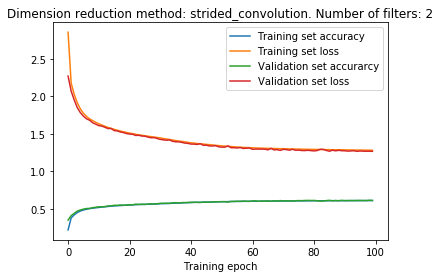

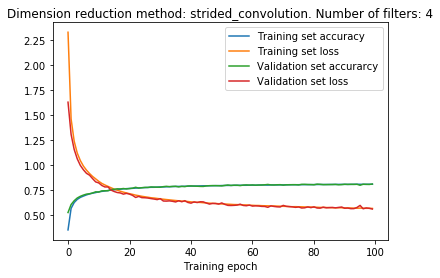

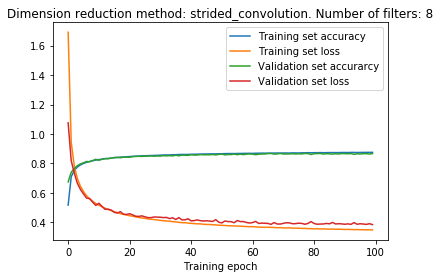

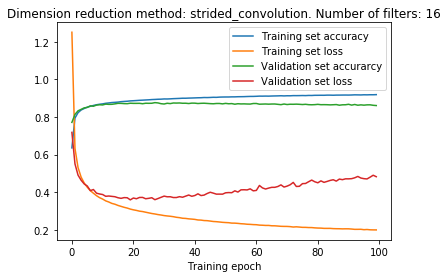

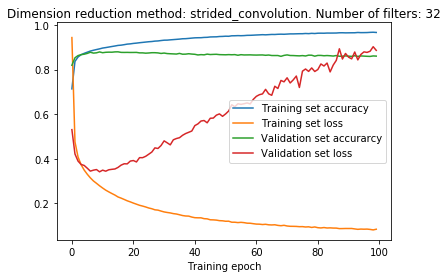

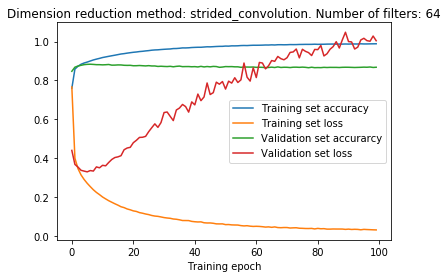

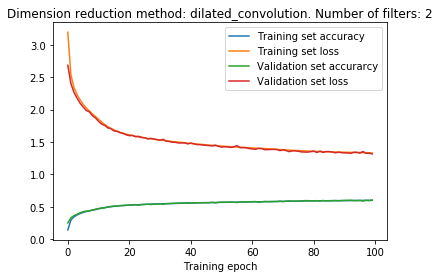

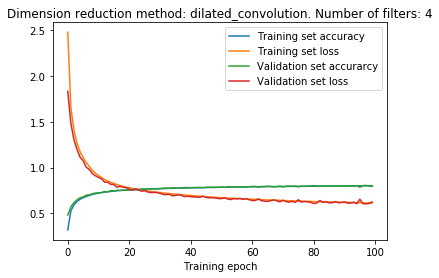

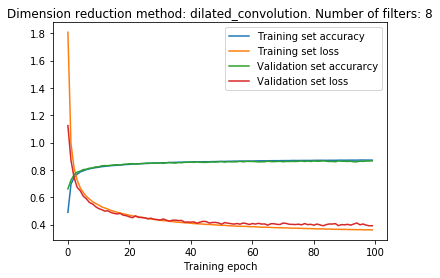

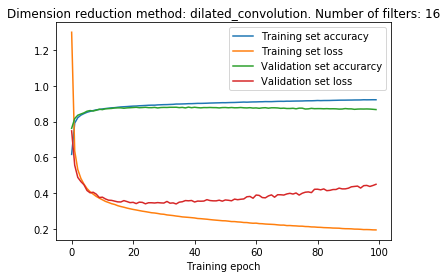

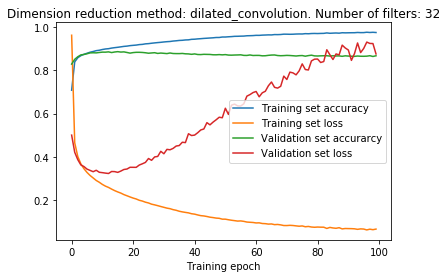

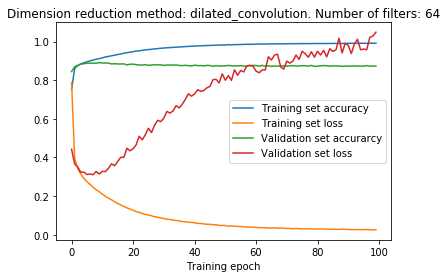

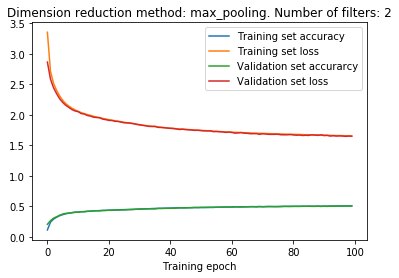

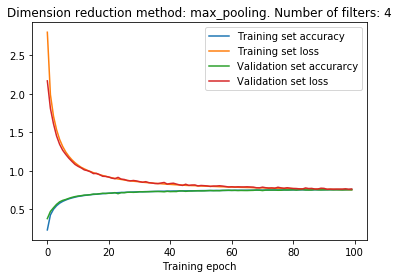

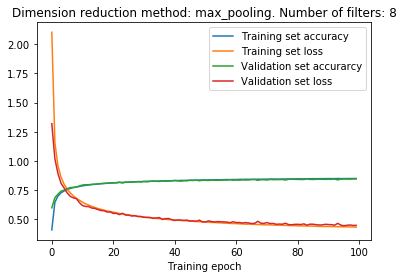

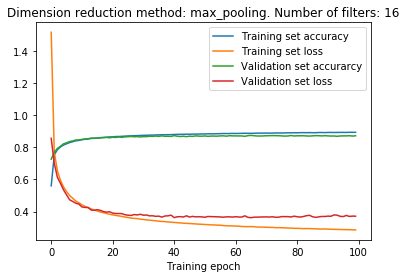

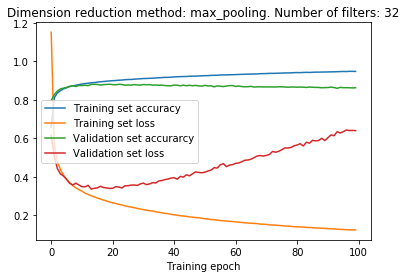

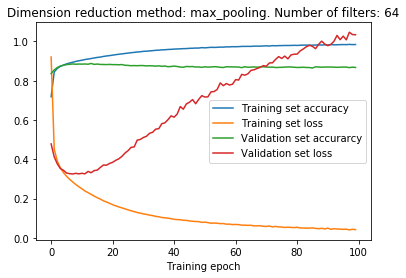

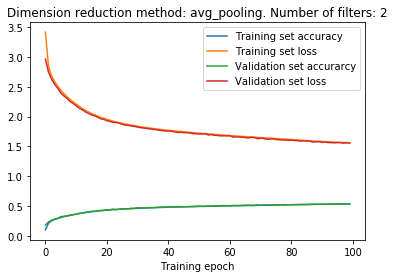

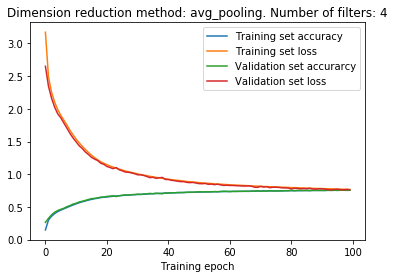

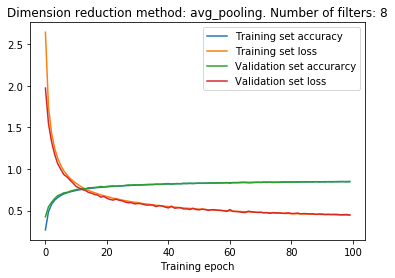

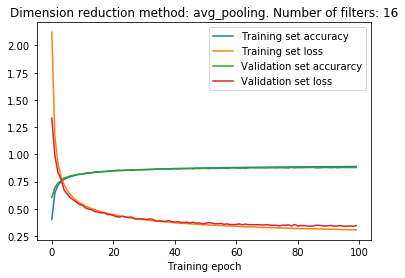

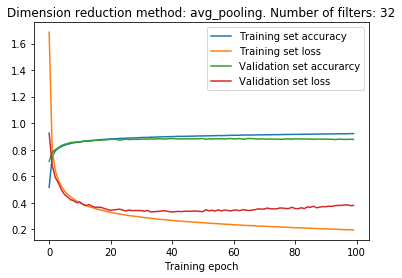

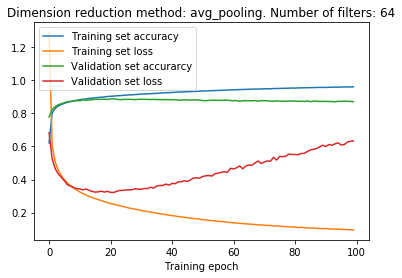

In [6]:
# plot complete runs for everything
legend = ["Training set accuracy", "Training set loss", "Validation set accurarcy", "Validation set loss", "Duration per training epoch"]
elements = [0,1,2,3] # elements of data legend for plot
x_axis = np.arange(num_epochs)


for var1 in range(num_var1):
    for var2 in range(num_var2):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(x_axis,mean_data[(var1,var2)][:,elements])
        title = (var1_name + ": " + str(var1_vals[var1]) + ". " + var2_name + ": " + str(var2_vals[var2]))
        ax.set_title(title)
        ax.legend(legend)
        ax.set_xlabel("Training epoch")



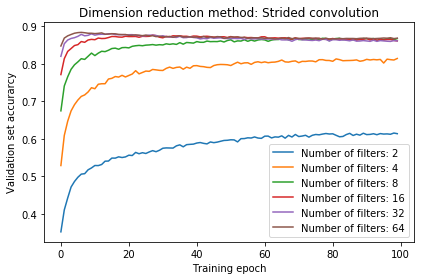

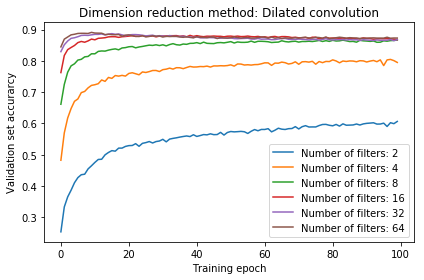

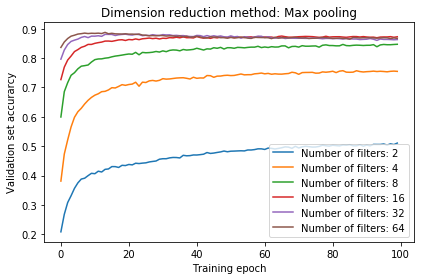

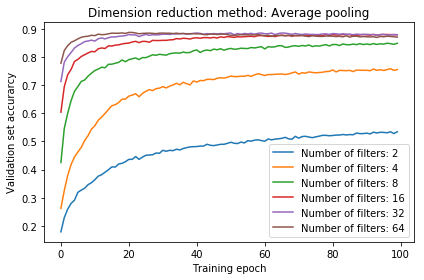

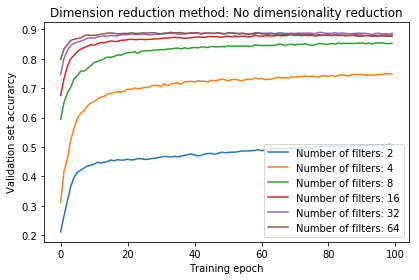

In [8]:
# plot while varying only var 1, over run, one y-axis
y_axis_labels = ["Training set accuracy", "Training set loss", "Validation set accurarcy", "Validation set loss", "Duration per training epoch"]
elements = 2 # element of data to put on y-axis
x_axis = np.arange(num_epochs)


for var1 in range(num_var1):
    fig = plt.figure()
#     fig.set_size_inches((3,2))
    ax = fig.add_subplot(111)
    title = (var1_name + ": " + str(var1_vals[var1]))
    ax.set_title(title)
    ax.set_xlabel("Training epoch")
    ax.set_ylabel(y_axis_labels[elements])
    for var2 in range(num_var2):
        ax.plot(x_axis,mean_data[(var1,var2)][:,elements], label=var2_name + ": " + str(var2_vals[var2]))
    ax.legend()
    fig.tight_layout()
    
    if var1 == 0 and save_exp2 == True:
        fig.savefig(savepath + "fil_stride.pdf")


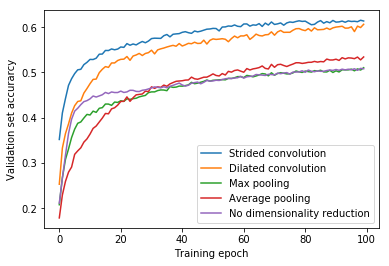

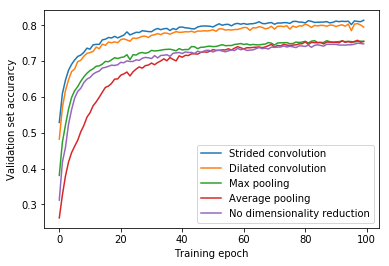

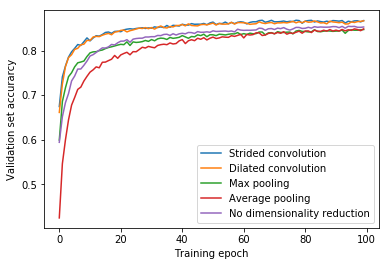

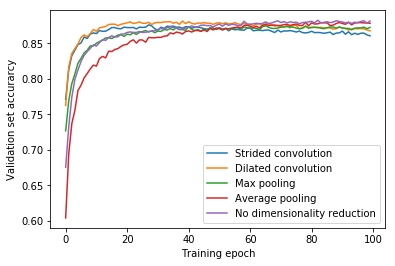

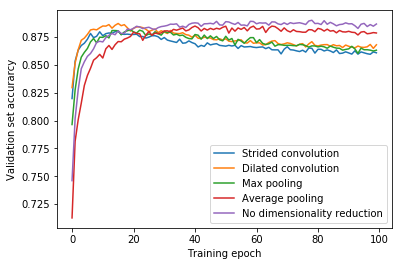

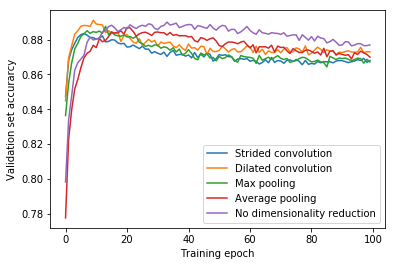

In [22]:
# plot while varying only vary 2, over run, one y-axis
y_axis_labels = ["Training set accuracy", "Training set loss", "Validation set accurarcy", "Validation set loss", "Duration per training epoch"]
elements = 2 # element of data to put on y-axis
x_axis = np.arange(num_epochs)

for var2 in range(num_var2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    title = (var2_name + ": " + str(var2_vals[var2]))
#     ax.set_title(title)
    ax.set_xlabel("Training epoch")
    ax.set_ylabel(y_axis_labels[elements])

    for var1 in range(num_var1):
        ax.plot(x_axis,mean_data[(var1,var2)][:,elements], label=str(var1_vals[var1]))
    ax.legend()

    if save_exp2 == True and (var2_vals[var2] == 8 or var2_vals[var2] == 64):
        fig.savefig(savepath + "fil_fil{}.pdf".format(var2_vals[var2]))
        
    

In [5]:
# Plot best/worst performance or something else (e.g. overall training time), NOT over timecourse
adjective = "Best "
source_array = maxot_data
source_std_array = std_maxot_data
y_axis_labels = ["training set accuracy", "training set loss", "validation set accurarcy", "validation set loss", "duration per training epoch"]
elements = 2 # element of data to put on y-axis


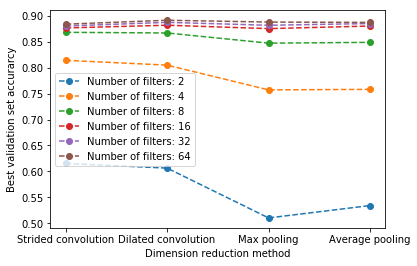

In [15]:
# var1 is axis
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(var1_name)
ax.set_ylabel(adjective + y_axis_labels[elements])
x_axis = var1_vals
for var2 in range(num_var2):
    temp = []
    for var1 in range(num_var1):
        temp.append(source_array[(var1,var2)][elements])
    ax.plot(x_axis, temp, label=var2_name + ": " + str(var2_vals[var2]), marker='o', linestyle='--')
    ax.legend()

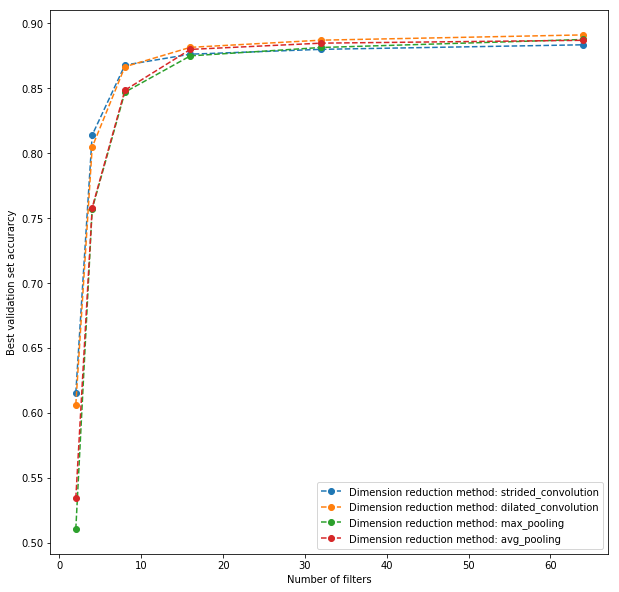

In [10]:
# var2 is axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel(var2_name)
ax.set_ylabel(adjective + y_axis_labels[elements])
x_axis = var2_vals

for var1 in range(num_var1):
    temp = []
    for var2 in range(num_var2):
        temp.append(source_array[(var1,var2)][elements])
    ax.plot(x_axis, temp, label=var1_name + ": " + str(var1_vals[var1]), marker='o', linestyle='--')
    ax.legend()
    ax.set_yscale('linear')
#     ax.set_xlim([3,65])

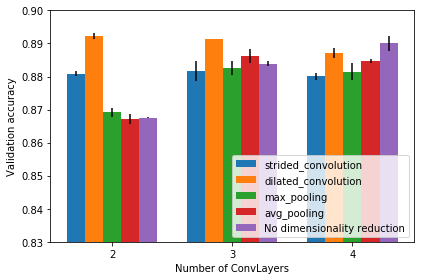

In [10]:
# best thing bar
fig, ax = plt.subplots()

index = np.arange(num_var2)
bar_width = 0.15

opacity = 0.4
error_config = {'ecolor': '0.3'}


for var1 in range(num_var1):
    means = [] 
    stds = []
    for var2 in range(num_var2):
        means.append(source_array[(var1,var2)][elements])
        stds.append(source_std_array[(var1,var2)][elements])

    
    ax.bar(index+var1*bar_width, means, bar_width, yerr=stds, label=str(var1_vals[var1]))



ax.set_xlabel(var2_name)
ax.set_ylabel('Validation accuracy')
ax.set_ylim([0.83, 0.9])

ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(var2_vals)
ax.legend(loc=4)

fig.tight_layout()
if save_exp2 == True:
    fig.savefig(savepath + "fil_bars.pdf")
if save_exp4 == True:
    fig.savefig(savepath + "lay_bars.pdf")


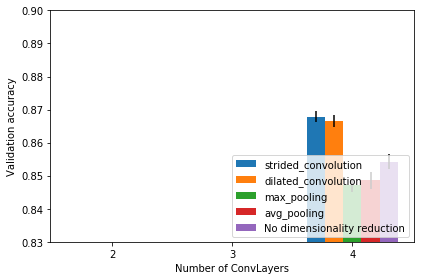

In [129]:
# best thing bar zoom
fig, ax = plt.subplots()

index = np.arange(num_var2)
bar_width = 0.15

opacity = 0.4
error_config = {'ecolor': '0.3'}


for var1 in range(num_var1):
    means = [] 
    stds = []
    for var2 in range(num_var2):
        means.append(source_array[(var1,var2)][elements])
        stds.append(source_std_array[(var1,var2)][elements])

    
    ax.bar(index+var1*bar_width, means, bar_width, yerr=stds, label=str(var1_vals[var1]))



ax.set_xlabel(var2_name)
ax.set_ylabel('Validation accuracy')
ax.set_ylim([0.83, 0.9])

ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(var2_vals)
# ax.set_xlim([1.5,6.5])
ax.legend(loc=4)
fig.tight_layout()
if save_exp2 == True:
    fig.savefig(savepath + "fil_bars_zoom.pdf")

In [41]:
maxot_data[(4,5)]

array([ 0.94154   ,  1.1546677 ,  0.89008439,  0.62867862, 33.15386667])

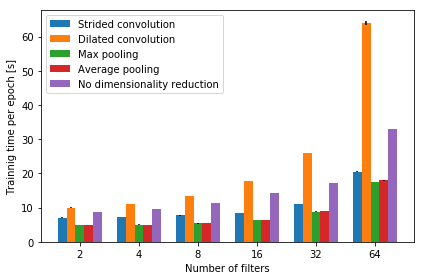

In [25]:
# training times
fig, ax = plt.subplots()

index = np.arange(num_var2)
bar_width = 0.15

opacity = 0.4
error_config = {'ecolor': '0.3'}


for var1 in range(num_var1):
    means = [] 
    stds = []

    for var2 in range(num_var2):
        means.append(mean_times[(var1,var2)])
        stds.append(std_times[(var1,var2)])
    
    ax.bar(index+var1*bar_width, means, bar_width, yerr=stds, label= str(var1_vals[var1]))



ax.set_xlabel(var2_name)
ax.set_ylabel('Trainnig time per epoch [s]')

ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(var2_vals)
ax.legend()

fig.tight_layout()

if save_exp2 == True:
    fig.savefig(savepath + "fil_times.pdf")



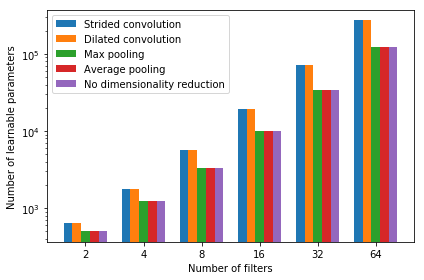

In [26]:
# number of parameters
fig, ax = plt.subplots()

index = np.arange(num_var2)
bar_width = 0.15

opacity = 0.4
error_config = {'ecolor': '0.3'}


for var1 in range(num_var1):
    nums = [] 
    
    for var2 in range(num_var2):
        nums.append(num_params[(var1,var2)])
    
    ax.bar(index+var1*bar_width, nums, bar_width, label=str(var1_vals[var1]))



ax.set_xlabel(var2_name)
ax.set_ylabel('Number of learnable parameters')
ax.set_yscale('log')

ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(var2_vals)
ax.legend()

fig.tight_layout()
if save_exp2 == True:
    fig.savefig(savepath + "fil_params.pdf")


In [72]:
tabulate

array([[0.21907   , 2.8614447 , 0.37139241, 2.181227  , 7.1615    ],
       [0.39709   , 2.0916038 , 0.42164557, 2.0046952 , 7.1438    ]])

In [15]:
# create table for Latex
val_acc_ind = 2
test_acc_ind = 0
var2 = 5
final_list = []
final_list.append(["Dimensionality reduction method", "Best epoch", 
                   "validation set accuracy", " ", "test set accuracy", " ", "Time per training epoch [s]", " "])

for var1 in range(num_var1):
    temp_list = [var1_vals[var1], 4, 64, int(max_ind_data[(var1,var2)][val_acc_ind]), maxot_data[(var1,var2)][val_acc_ind], std_maxot_data[(var1,var2)][val_acc_ind], 
                 mean_test_data[(var1,var2)][test_acc_ind], std_test_data[(var1,var2)][test_acc_ind],
                mean_times[(var1,var2)], std_times[(var1,var2)]]
    final_list.append(temp_list)
    
    

print(tabulate(final_list, floatfmt="#.4g", headers="firstrow", tablefmt="latex"))

\begin{tabular}{lrrrrrrrrr}
\hline
                             &    &   Dimensionality reduction method &   Best epoch &   validation set accuracy &          &   test set accuracy &           &   Time per training epoch [s] &         \\
\hline
 Strided convolution         &  4 &                                64 &            6 &                    0.8835 & 0.001609 &              0.8743 & 0.002546  &                         20.51 & 0.09839 \\
 Dilated convolution         &  4 &                                64 &            9 &                    0.8911 & 0.001766 &              0.8824 & 0.0006378 &                         64.03 & 0.5703  \\
 Max pooling                 &  4 &                                64 &           13 &                    0.8876 & 0.002036 &              0.8792 & 0.001144  &                         17.51 & 0.04830 \\
 Average pooling             &  4 &                                64 &           20 &                    0.8870 & 0.002160 &              0.8790 

In [16]:
final_list

[['Dimensionality reduction method',
  'Best epoch',
  'validation set accuracy',
  ' ',
  'test set accuracy',
  ' ',
  'Time per training epoch [s]',
  ' '],
 ['Strided convolution',
  4,
  64,
  6,
  0.8835232067510548,
  0.0016089178029484391,
  0.8743037974683544,
  0.0025463706784159146,
  20.513198999999997,
  0.09838763793790352],
 ['Dilated convolution',
  4,
  64,
  9,
  0.8911392405063293,
  0.001766113884933023,
  0.8823628691983122,
  0.0006378150404147975,
  64.02809366666668,
  0.5703152476130099],
 ['Max pooling',
  4,
  64,
  13,
  0.8876160337552744,
  0.002036056264378989,
  0.8791983122362869,
  0.0011443081537822395,
  17.512377,
  0.04830150347211429],
 ['Average pooling',
  4,
  64,
  20,
  0.8869831223628691,
  0.0021595380245181626,
  0.8789662447257385,
  0.0013577715535616356,
  17.97103166666666,
  0.04681791641265361],
 ['No dimensionality reduction',
  4,
  64,
  33,
  0.890084388185654,
  0.0028634529222171167,
  0.8833122362869199,
  0.001064512726712443

In [20]:
# overall training time
for ii in range(1,6):
    print(final_list[ii][3] * final_list[ii][8])

123.07919399999997
576.2528430000001
227.66090100000002
359.4206333333332
1088.672706
